input mean 0.00036 and std 0.99942
layer 1 mean 0.39655 and std 0.58050
layer 2 mean 0.39097 and std 0.57310
layer 3 mean 0.39013 and std 0.57215
layer 4 mean 0.38912 and std 0.57075
layer 5 mean 0.38809 and std 0.57041
layer 6 mean 0.38675 and std 0.56902
layer 7 mean 0.38525 and std 0.56721
layer 8 mean 0.38357 and std 0.56485
layer 9 mean 0.38152 and std 0.56284


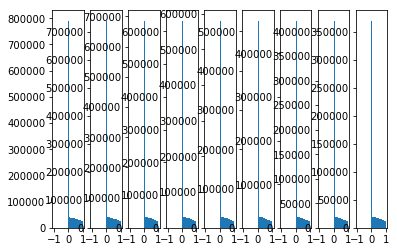

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

graph = tf.Graph()
with graph.as_default():
  data = tf.constant(np.random.randn(2000, 800).astype('float32'))
  layer_sizes = [800 - 50 * i for i in range(0,10)]
  num_layers = len(layer_sizes)
  
  fcs = []
  for i in range(0, num_layers - 1):
    X = data if i == 0 else fcs[i - 1]
    node_in = layer_sizes[i]
    node_out = layer_sizes[i + 1]
    W = tf.Variable(np.random.randn(node_in, node_out).astype('float32')) * 0.01 #/ np.sqrt(node_in)
    fc = tf.matmul(X, W)
    fc = tf.contrib.layers.batch_norm(fc, center=True, scale=True,
                                      is_training=True)
    fc = tf.nn.relu(fc)
    fcs.append(fc)
    
with tf.Session(graph=graph) as sess:
  sess.run(tf.global_variables_initializer())
  
  print('input mean {0:.5f} and std {1:.5f}'.format(np.mean(data.eval()),
                                          np.std(data.eval())))
  for idx, fc in enumerate(fcs):
    print('layer {0} mean {1:.5f} and std {2:.5f}'.format(idx+1, np.mean(fc.eval()),
                                               np.std(fc.eval())))
  
  plt.figure()
  for idx, fc in enumerate(fcs):
    plt.subplot(1, len(fcs), idx+1)
    plt.hist(fc.eval().flatten(), 30, range=[-1,1])